## 1. Set Up the Database
    1. Create a connection to an SQLite database file named student_grades.db. If the database file does not exist, SQLite will automatically create it.
    2. Create a cursor object to interact with the database.

In [1]:
# Import package
import sqlite3

# Create or connect to an SQLite database
connection = sqlite3.connect('student_grades.db')

# Create a cursor object
cursor = connection.cursor()

## 2. Create the Necessary Tables
You will need two tables for this assignment:
    • students: A table to store student information.
    • grades: A table to store student grades for different subjects.

The structure of the tables should be as follows:

students table:
    
    • student_id (INTEGER, Primary Key, Auto-increment)
    
    • first_name (TEXT)
    
    • last_name (TEXT)

grades table:
    
    • grade_id (INTEGER, Primary Key, Auto-increment)
    
    • student_id (INTEGER, Foreign Key linked to students table)
    
    • subject (TEXT)
    
    • grade (INTEGER)

In [2]:
# Create students table
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)           
''')

# Create grades table
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER
)           
''')

## 3. Insert Data into the Tables
Insert at least 5 students into the students table and at least 3 grades for each student into the grades table.

In [3]:
# Create data to student table
students_data = [
    (1, 'Alice', 'Johnson'),
    (2, 'Bob', 'Smith'),
    (3, 'Carol', 'White'),
    (4, 'David', 'Brown'),
    (5, 'Eve', 'Davis')
]

# Insert data into table
cursor.executemany('''
    INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data
)

# Create data to grades table
grades_data = [
    (1, 1, "Math", 95),
    (2, 1, "English", 88),
    (3, 1, 'History', 90),
    (4, 2, "Math", 82),
    (5, 2, 'English', 76),
    (6, 2, "History", 85),
    (7, 3, "Math", 92),
    (8, 3, "English", 99),
    (9, 3, 'History', 83),
    (10, 4, "Math", 77),
    (11, 4, 'English', 68),
    (12, 4, "History", 81),
    (13, 5, "Math", 83),
    (14, 5, 'English', 76),
    (15, 5, "History", 84),
]

# Insert data into table
cursor.executemany('''
    INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data
)

## 4. Perform SQL Queries
Write SQL queries to answer the following questions:
1. Retrieve all students' names and their grades.
2. Find the average grade for each student.
3. Find the student with the highest average grade.
4. Find the average grade for the Math subject.
5. List all students who scored above 90 in any subject.

In [4]:
# SQL Query 1
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM grades 
JOIN students ON students.student_id = grades.student_id
''')

# Print results
for i in cursor.fetchall():
    print(i)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 92)
('Carol', 'White', 'English', 99)
('Carol', 'White', 'History', 83)
('David', 'Brown', 'Math', 77)
('David', 'Brown', 'English', 68)
('David', 'Brown', 'History', 81)
('Eve', 'Davis', 'Math', 83)
('Eve', 'Davis', 'English', 76)
('Eve', 'Davis', 'History', 84)


In [5]:
# SQL Query 2
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grades.grade)
FROM grades 
JOIN students ON students.student_id = grades.student_id
GROUP BY students.last_name
ORDER BY AVG(grades.grade) DESC
''')

# Print results
for i in cursor.fetchall():
    print(i)

('Carol', 'White', 91.33333333333333)
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Eve', 'Davis', 81.0)
('David', 'Brown', 75.33333333333333)


In [6]:
# SQL Query 3
cursor.execute('''
SELECT students.first_name, students.last_name
FROM grades 
JOIN students ON students.student_id = grades.student_id
GROUP BY students.last_name
ORDER BY AVG(grades.grade) DESC
LIMIT 1
''')

# Print results
print(cursor.fetchall())

[('Carol', 'White')]


In [7]:
# SQL Query 4
cursor.execute('''
SELECT AVG(grades.grade)
FROM grades
WHERE grades.subject = 'Math'
''')

# Print results
print(cursor.fetchall()[0][0])

85.8


In [8]:
# SQL Query 5
cursor.execute('''
SELECT students.first_name, students.last_name
FROM grades
JOIN students ON students.student_id = grades.student_id
WHERE students.last_name IN (
    SELECT students.last_name
    FROM grades 
    JOIN students ON students.student_id = grades.student_id
    WHERE grades.grade > 90
)
''')

# Print results
for i in cursor.fetchall():
    print(i)

('Alice', 'Johnson')
('Alice', 'Johnson')
('Alice', 'Johnson')
('Carol', 'White')
('Carol', 'White')
('Carol', 'White')


## 5. Load Data into Pandas
1. Use Pandas to load the data from the students and grades tables into DataFrames.
2. Use JOIN queries to combine the data from both tables into a single DataFrame that includes each student's name, subject, and grade.
3. Visualize the data with Matplotlib:

    o Plot the average grades for each student.
    
    o Create a bar chart showing the average grade for each subject.

In [9]:
# Import pandas
import pandas as pd

# Query the grades and sales date into DataFrames
dfgrades = pd.read_sql_query('SELECT * FROM grades', connection)
dfstudents = pd.read_sql_query('SELECT * FROM students', connection)

In [10]:
# Combined dataframe
df = pd.read_sql_query('''
    SELECT grades.grade_id, students.first_name, students.last_name, grades.subject, grades.grade
    FROM grades
    JOIN students ON students.student_id = grades.student_id
''', connection)

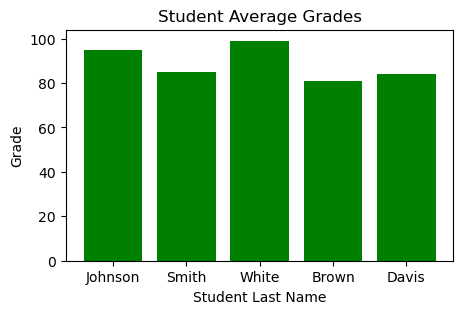

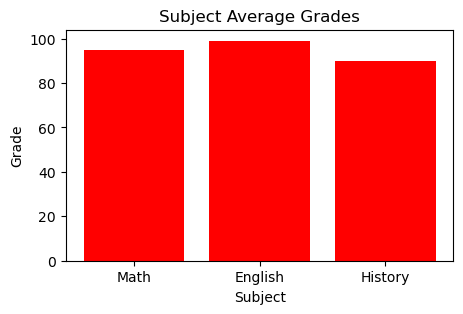

In [11]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot average grades for each student
plt.figure(figsize=(5,3))
plt.bar(df['last_name'], df['grade'], color='green')
plt.xlabel('Student Last Name')
plt.ylabel('Grade')
plt.title('Student Average Grades')
plt.show()

# Plot average grades for each subject
plt.figure(figsize=(5,3))
plt.bar(df['subject'], df['grade'], color='red')
plt.xlabel('Subject')
plt.ylabel('Grade')
plt.title('Subject Average Grades')
plt.show()